# Explore Data

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [12]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.csv'

In [13]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/figure_four/raws'

In [14]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,-1.895022,...,Low,28.0,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,-1.909919,...,Low,22.0,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,-0.803738,...,Low,19.0,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,-1.401520,...,Low,17.0,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,-1.401705,...,Low,19.0,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,51,68.0,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,52,53.0,NaN,NaN,NaN,-1.320000,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,53,59.0,NaN,NaN,NaN,1.260000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,55,62.0,NaN,NaN,NaN,1.210000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [15]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection',
       'Cognitive_Baseline', 'Z_Scored_Cognitive_Baseline',
       'Z_Scored_Cognitive_Baseline__Lower_is_Better_',
       'Min_Max

In [16]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement']

In [17]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,-1.895022,...,Low,28.0,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,-1.909919,...,Low,22.0,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,-0.803738,...,Low,19.0,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,-1.401520,...,Low,17.0,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,-1.401705,...,Low,19.0,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,42,63.0,0.000000,0.000000,NaN,-0.574000,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,45,60.0,0.000000,0.000000,NaN,0.190000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,73.0,-0.500000,0.500000,NaN,0.390000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,49,68.0,0.000000,0.000000,NaN,-0.756000,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [18]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection',
       'Cognitive_Baseline', 'Z_Scored_Cognitive_Baseline',
       'Z_Scored_Cognitive_Baseline__Lower_is_Better_',
       'Min_Max

Set the parameters for dropping rows

In [19]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = "Wurzburg"  # The value to compare against

In [20]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
46,1,57.0,-2.609929,-1.372562,-5.673759,1.080695,30.376565,-0.113151,0.273890,1.300775,...,High,141.0,-0.115295,-0.115295,0.625,0.625,22.020300,20.467840,1.056258,0.508516
47,2,50.0,0.992806,1.331414,2.158273,-0.930548,16.295870,-0.502484,-0.154892,-0.834092,...,Low,139.0,-0.935174,-0.935174,0.375,0.375,11.487188,4.942970,-0.759238,-1.629565
48,3,62.0,-0.638889,0.106772,-1.388889,1.155469,30.900051,-0.398033,0.030553,0.548198,...,High,144.0,1.114522,1.114522,1.000,1.000,23.013479,22.145924,1.227443,0.739621
49,4,50.0,-0.985714,-0.153533,-2.142857,-0.228971,21.207602,-0.426115,-0.043983,-0.295586,...,Low,140.0,-0.525235,-0.525235,0.500,0.500,12.198485,18.933435,-0.636638,0.297198
50,6,60.0,-0.323944,0.343149,-0.704225,0.109572,23.577739,-0.454075,-0.053915,-0.084635,...,High,142.0,0.294644,0.294644,0.750,0.750,17.634088,18.128314,0.300247,0.186317
51,7,73.0,-0.326241,0.341424,-0.709220,1.977842,36.657479,-0.177886,0.269167,1.688136,...,High,141.0,-0.115295,-0.115295,0.625,0.625,24.162033,27.503198,1.425409,1.477423
52,9,64.0,-0.985714,-0.153533,-2.142857,-0.407778,19.955774,-0.494405,-0.132818,-0.631960,...,Low,140.0,-0.525235,-0.525235,0.500,0.500,10.782803,14.964053,-0.880646,-0.249464
53,11,62.0,-0.319444,0.346526,-0.694444,-1.093332,15.156220,-0.507962,-0.165672,-1.049905,...,Low,144.0,1.114522,1.114522,1.000,1.000,9.653427,12.002916,-1.075306,-0.657271
54,12,54.0,0.000000,0.586280,0.000000,0.788134,28.328345,-0.220427,0.210477,1.138770,...,High,136.0,-2.164991,-2.164991,0.000,0.000,21.521001,21.243697,0.970198,0.615367
55,14,49.0,0.321678,0.827710,0.699301,-0.455880,19.619016,-0.440579,-0.072634,-0.467260,...,Low,143.0,0.704583,0.704583,0.875,0.875,10.881447,15.224677,-0.863644,-0.213571


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [78]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [79]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column Disease: Could not convert ParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinson to numeric
Unable to standardize column City: Could not convert BostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBoston to numeric
Unable to standardize column Age_Group: Could not convert youngyoungyoungoldyoungoldyoungyoungyoungyoungyoungyoungyoungyoungyoungyoung to numeric
Unable to standardize column Age_And_Disease: Could not convert Parkinson_youngParkinson_youngParkinson_youngParkinson_oldParkinson_youngParkinson_oldParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_young to numeric
Unable to standardize column Subiculum_Group: Could not convert highhighlowlowlowlowhighhighlowlowhighlowhighhighlowhigh to numeric
Unable to standardize column Age_Dise

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
80,-1.652802,65.0,-0.855337,0.855337,0.447214,0.111202,-1.920852,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,-1.353144,69.0,0.197386,-0.197386,0.447214,0.132081,0.763335,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,-1.278229,67.0,0.197386,-0.197386,0.447214,-0.116636,-0.494291,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,-1.053486,62.0,0.197386,-0.197386,0.447214,-2.066439,1.157517,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,-0.903657,68.0,-0.855337,0.855337,0.447214,-1.210762,0.143907,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,-0.678913,48.0,1.250108,-1.250108,-2.236068,-0.387030,0.350383,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,-0.004682,62.0,0.197386,-0.197386,NaN,0.899908,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,0.145147,56.0,-1.908060,1.908060,NaN,0.421870,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,0.220061,60.0,0.197386,-0.197386,NaN,-0.490852,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,0.444805,63.0,0.197386,-0.197386,NaN,-0.137172,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.5 - Descriptive Stats

In [21]:
data_df.describe()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Inclusion_Cohort,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,18.500000,58.192308,-0.631497,0.112320,-1.372819,0.042565,23.108623,-0.377494,0.005216,0.049922,...,1.0,141.423077,0.058140,0.058140,0.677885,0.677885,16.093656,17.465300,0.034737,0.095007
std,11.057124,8.173221,1.254946,0.941880,2.728143,1.007423,7.052956,0.168917,0.191821,1.011204,...,0.0,2.318156,0.950303,0.950303,0.289769,0.289769,5.645332,6.951343,0.973034,0.957337
min,1.000000,46.000000,-4.535211,-2.817552,-9.859155,-1.108473,15.050219,-0.659502,-0.363412,-1.750573,...,1.0,136.000000,-2.164991,-2.164991,0.000000,0.000000,6.780175,4.942970,-1.570542,-1.629565
25%,9.500000,52.000000,-0.902406,-0.091007,-1.961753,-0.754115,17.531073,-0.501107,-0.149374,-0.783559,...,1.0,140.000000,-0.525235,-0.525235,0.500000,0.500000,10.932434,12.370445,-0.854856,-0.606655
50%,18.500000,58.000000,-0.482565,0.224098,-1.049054,-0.318375,20.581688,-0.419957,-0.012959,-0.158696,...,1.0,141.500000,0.089674,0.089674,0.687500,0.687500,15.488680,17.848016,-0.069538,0.147714
75%,27.750000,63.500000,0.000000,0.586280,0.000000,0.861715,28.843487,-0.286065,0.095756,0.651711,...,1.0,143.750000,1.012037,1.012037,0.968750,0.968750,21.771551,22.136585,1.013383,0.738335
max,37.000000,79.000000,1.000000,1.336814,2.173913,2.357590,39.316089,0.047449,0.458081,2.442475,...,1.0,144.000000,1.114522,1.114522,1.000000,1.000000,24.395433,33.143996,1.465638,2.254272


# 02 - Visualize 3D Data

In [94]:
import plotly.express as px

def generate_scatterplot(dataframe, data_dict, correlation, palette, out_dir):
    """
    Generates a 3D scatter plot from the given DataFrame and saves it to the specified directory.

    Parameters:
    - dataframe: pandas DataFrame containing the data.
    - data_dict: Dictionary with one key-value pair, where the key is the dependent variable 
                 and the value is a list of independent variables (length should be 2 for 3D scatter).
    - x_label, y_label, z_label: Labels for the x, y, and z axes.
    - correlation: Whether to display correlation information on the plot (True/False).
    - palette: Color palette for the plot.
    - out_dir: Directory path where the plot image will be saved.
    """
    dependent_var = list(data_dict.keys())[0]
    independent_vars = data_dict[dependent_var]

    if len(independent_vars) != 2:
        raise ValueError("Independent variable list must contain exactly two elements for 3D scatter plot.")

    fig = px.scatter_3d(dataframe, x=independent_vars[0], y=independent_vars[1], z=dependent_var,
                        color=dependent_var, color_continuous_scale=palette)

    # Set the labels
    fig.update_layout(scene=dict(
        xaxis_title=independent_vars[0],
        yaxis_title=independent_vars[1],
        zaxis_title=dependent_var
    ))

    # Optionally, add correlation info as annotation
    if correlation:
        # Compute and display correlation (requires additional implementation)
        pass

    # Save the plot to the output directory
    fig.write_image(f"{out_dir}/3d_scatter_plot.png")

    return fig

In [98]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection',
       'Cognitive_Baseline', 'Z_Scored_Cognitive_Baseline',
       'Z_Scored_Cognitive_Baseline__Lower_is_Better_',
       'Min_Max

In [101]:
data_dict = {'Z_Scored_Percent_Cognitive_Improvement': ['Age', 'Z_Scored_Subiculum_Connectivity']}

In [102]:
# Example usage
plot = generate_scatterplot(dataframe=data_df, 
                            data_dict=data_dict,
                            correlation=True,
                            palette='Reds',
                            out_dir=out_dir)
plot

# 03 - Visualize Distribution

In [14]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection',
       'Cognitive_Baseline', 'Z_Scored_Cognitive_Baseline'],
      dtype='object')

In [62]:
scatter_variable = 'Z_Scored_Cognitive_Baseline'
categorical_variable = 'Disease'

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import os

def create_custom_stripplot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")

    # Get/set params for the color mapping
    vcenter = hue_change_value
    vmin, vmax = data[y_variable].min(), data[y_variable].max()
    normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
    colormap = cm.coolwarm

    # Create a scatter plot with custom color mapping
    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(
        x=x_variable,
        y=y_variable,
        data=data,
        c=data[y_variable],
        norm=normalize,
        cmap=colormap,
    )
    ax.axhline(y=vcenter, color='gray', linestyle='--')

    # Tweak the points to mimic `sns.stripplot`
    pts = ax.collections[0]
    pts.set_offsets(pts.get_offsets() + np.c_[np.random.uniform(-0.1, 0.1, len(data)), np.zeros(len(data))])
    ax.margins(x=0.15)

    scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappable.set_array(data[y_variable])

    # Add a colorbar
    cbar = plt.colorbar(scalarmappable, ax=ax)
    cbar.set_label(y_variable)

    plt.title(f'Strip Plot of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/strip_plot.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/strip_plot.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/strip_plot.svg')
    else:
        plt.show()

In [58]:
# Example usage:
create_custom_stripplot(data_df, categorical_variable, scatter_variable, 0, out_dir=out_dir)

ValueError: vmin, vcenter, and vmax must be in ascending order

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def create_distribution_violin_plot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")
    plt.figure(figsize=(5, 6))

    # Create the violin plot with specified parameters
    sns.violinplot(data=data, x=x_variable, y=y_variable, hue=x_variable, width=.9, cut=2, split=False, inner='box', palette='Greys', alpha=0.1)

    # Create the swarm plot on top of the violin plot
    sns.swarmplot(data=data, x=x_variable, y=y_variable, hue=x_variable, palette=['red', 'blue'], alpha=0.7)

    plt.title(f'Strip Plot with Hemi Violin of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/distribution_violin.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/distribution_violin.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/distribution_violin.svg')
    else:
        plt.show()



Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/figure_four/raws/distribution_violin.svg


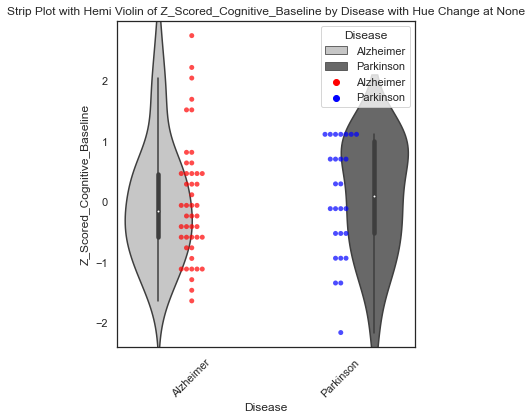

In [65]:
# Example usage:
create_distribution_violin_plot(data_df, categorical_variable, scatter_variable, None, out_dir=out_dir)